# Predicting the future Stock Market price with Markov Chain

## Import Libraries

In [1]:
%matplotlib inline
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint
from datetime import datetime,timedelta

## Load Dataset

In [2]:
acc_df = pd.read_csv('ACC_historical.csv')

acc_df.rename(columns = {'date':'Date','open':'Open','high':'High','low':'Low','close':'Close','volume':'Volume'}, inplace = True)
acc_df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4197,2021-04-19,43.919998,44.340000,43.490002,44.299999,986200,0.0,0
4198,2021-04-20,44.340000,45.330002,43.950001,44.880001,1127600,0.0,0
4199,2021-04-21,45.029999,46.169998,44.680000,45.959999,1130000,0.0,0
4200,2021-04-22,45.869999,46.299999,45.189999,45.410000,516300,0.0,0
4201,2021-04-23,45.590000,45.930000,45.220001,45.720001,554800,0.0,0


In [3]:
acc_df['Date'] = pd.to_datetime(acc_df['Date'])

In [5]:
# take random sets of sequential rows 
new_set = []
for row_set in tqdm(range(0, 100000)):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(acc_df)-row_quant)
    market_subset = acc_df.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))


  0%|                                                                             | 42/100000 [00:00<09:20, 178.35it/s]

0
2007-08-15 00:00:00


  2%|█▌                                                                         | 2037/100000 [00:07<06:02, 270.48it/s]

2000
2014-05-20 00:00:00


  4%|███                                                                        | 4027/100000 [00:18<07:00, 228.49it/s]

4000
2015-11-23 00:00:00


  6%|████▌                                                                      | 6018/100000 [00:27<07:12, 217.25it/s]

6000
2006-07-11 00:00:00


  8%|██████                                                                     | 8034/100000 [00:35<05:30, 278.43it/s]

8000
2005-04-04 00:00:00


 10%|███████▍                                                                  | 10048/100000 [00:44<05:17, 283.37it/s]

10000
2009-09-15 00:00:00


 12%|████████▉                                                                 | 12058/100000 [00:52<05:46, 253.67it/s]

12000
2016-06-06 00:00:00


 14%|██████████▍                                                               | 14072/100000 [01:01<05:22, 266.29it/s]

14000
2015-07-21 00:00:00


 16%|███████████▉                                                              | 16050/100000 [01:08<05:37, 249.06it/s]

16000
2012-11-01 00:00:00


 18%|█████████████▎                                                            | 18026/100000 [01:16<05:34, 244.97it/s]

18000
2006-03-20 00:00:00


 20%|██████████████▊                                                           | 20034/100000 [01:26<06:00, 221.87it/s]

20000
2007-05-15 00:00:00


 22%|████████████████▎                                                         | 22058/100000 [01:34<05:38, 230.10it/s]

22000
2005-05-25 00:00:00


 24%|█████████████████▊                                                        | 24030/100000 [01:42<05:04, 249.69it/s]

24000
2007-10-10 00:00:00


 26%|███████████████████▎                                                      | 26038/100000 [01:51<04:38, 266.04it/s]

26000
2007-03-02 00:00:00


 28%|████████████████████▊                                                     | 28052/100000 [01:59<05:01, 239.02it/s]

28000
2017-04-10 00:00:00


 30%|██████████████████████▎                                                   | 30078/100000 [02:07<04:10, 279.29it/s]

30000
2006-02-14 00:00:00


 32%|███████████████████████▋                                                  | 32076/100000 [02:14<04:20, 260.51it/s]

32000
2012-01-19 00:00:00


 34%|█████████████████████████▏                                                | 34018/100000 [02:22<04:25, 248.40it/s]

34000
2019-11-06 00:00:00


 36%|██████████████████████████▋                                               | 36041/100000 [02:29<03:41, 288.87it/s]

36000
2007-09-06 00:00:00


 38%|████████████████████████████▏                                             | 38031/100000 [02:37<04:53, 211.14it/s]

38000
2010-03-04 00:00:00


 40%|█████████████████████████████▋                                            | 40050/100000 [02:45<03:37, 275.19it/s]

40000
2014-02-05 00:00:00


 42%|███████████████████████████████                                           | 42043/100000 [02:52<03:21, 287.39it/s]

42000
2012-05-11 00:00:00


 44%|████████████████████████████████▌                                         | 44044/100000 [02:59<03:12, 291.05it/s]

44000
2019-07-03 00:00:00


 46%|██████████████████████████████████                                        | 46064/100000 [03:06<03:04, 292.63it/s]

46000
2007-06-08 00:00:00


 48%|███████████████████████████████████▌                                      | 48043/100000 [03:13<02:57, 291.90it/s]

48000
2006-09-20 00:00:00


 50%|█████████████████████████████████████                                     | 50035/100000 [03:21<04:12, 197.99it/s]

50000
2018-04-23 00:00:00


 52%|██████████████████████████████████████▌                                   | 52072/100000 [03:29<03:08, 254.70it/s]

52000
2008-07-01 00:00:00


 54%|███████████████████████████████████████▉                                  | 54045/100000 [03:36<02:39, 288.57it/s]

54000
2015-03-12 00:00:00


 56%|█████████████████████████████████████████▌                                | 56083/100000 [03:44<02:31, 290.27it/s]

56000
2012-04-04 00:00:00


 58%|██████████████████████████████████████████▉                               | 58046/100000 [03:50<02:26, 286.05it/s]

58000
2011-04-07 00:00:00


 60%|████████████████████████████████████████████▍                             | 60044/100000 [03:57<02:16, 292.29it/s]

60000
2020-08-25 00:00:00


 62%|█████████████████████████████████████████████▉                            | 62078/100000 [04:05<02:13, 283.27it/s]

62000
2016-03-17 00:00:00


 64%|███████████████████████████████████████████████▍                          | 64049/100000 [04:12<02:06, 285.26it/s]

64000
2005-02-17 00:00:00


 66%|████████████████████████████████████████████████▊                         | 66034/100000 [04:18<01:56, 290.73it/s]

66000
2020-07-08 00:00:00


 68%|██████████████████████████████████████████████████▎                       | 68063/100000 [04:25<01:50, 290.14it/s]

68000
2014-11-14 00:00:00


 70%|███████████████████████████████████████████████████▊                      | 70056/100000 [04:32<01:43, 289.57it/s]

70000
2008-10-14 00:00:00


 72%|█████████████████████████████████████████████████████▎                    | 72040/100000 [04:40<01:37, 285.79it/s]

72000
2011-01-21 00:00:00


 74%|██████████████████████████████████████████████████████▊                   | 74071/100000 [04:47<01:30, 285.38it/s]

74000
2005-06-06 00:00:00


 76%|████████████████████████████████████████████████████████▎                 | 76032/100000 [04:54<01:26, 276.99it/s]

76000
2014-05-19 00:00:00


 78%|█████████████████████████████████████████████████████████▊                | 78087/100000 [05:01<01:16, 285.72it/s]

78000
2018-03-13 00:00:00


 80%|███████████████████████████████████████████████████████████▎              | 80076/100000 [05:08<01:09, 285.31it/s]

80000
2005-07-14 00:00:00


 82%|████████████████████████████████████████████████████████████▋             | 82043/100000 [05:15<01:02, 287.50it/s]

82000
2021-02-04 00:00:00


 84%|██████████████████████████████████████████████████████████████▏           | 84056/100000 [05:22<00:56, 283.05it/s]

84000
2018-09-06 00:00:00


 86%|███████████████████████████████████████████████████████████████▋          | 86058/100000 [05:29<00:48, 287.79it/s]

86000
2012-12-13 00:00:00


 88%|█████████████████████████████████████████████████████████████████▏        | 88082/100000 [05:37<00:41, 288.69it/s]

88000
2014-01-28 00:00:00


 90%|██████████████████████████████████████████████████████████████████▋       | 90050/100000 [05:44<00:35, 281.05it/s]

90000
2005-06-02 00:00:00


 92%|████████████████████████████████████████████████████████████████████      | 92049/100000 [05:51<00:27, 285.21it/s]

92000
2006-07-13 00:00:00


 94%|█████████████████████████████████████████████████████████████████████▌    | 94081/100000 [05:58<00:20, 289.64it/s]

94000
2015-01-15 00:00:00


 96%|███████████████████████████████████████████████████████████████████████   | 96071/100000 [06:05<00:13, 280.69it/s]

96000
2007-11-09 00:00:00


 98%|████████████████████████████████████████████████████████████████████████▌ | 98033/100000 [06:12<00:06, 292.34it/s]

98000
2018-08-01 00:00:00


100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [06:19<00:00, 263.46it/s]


In [6]:
len(market_subset)

18

## Removing the null values


In [7]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(1999385, 8)
(1799385, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
1191,99998,2009-05-14,0.063703,0.041161,3.998108e-02,0.022328,3.477480e-02,-696500.0
1192,99998,2009-05-14,-0.042223,-0.046192,3.618651e-03,-0.349701,-2.199736e-02,-55800.0
1193,99998,2009-05-14,-0.011696,-0.013089,-4.641745e-02,-0.043082,-1.347109e-02,153600.0
1194,99998,2009-05-14,-0.032772,-0.047304,-1.370538e-02,0.123931,-1.116797e-02,-296500.0
2412,99999,2014-04-08,-0.000540,-0.003996,-5.954694e-03,0.219165,-2.957006e-03,-94200.0
2413,99999,2014-04-08,-0.005392,-0.006151,1.361365e-03,-0.122179,-5.660353e-03,-112500.0
2414,99999,2014-04-08,-0.023312,-0.000807,-2.392556e-02,-0.166223,-2.331257e-02,88000.0
2415,99999,2014-04-08,0.009714,-0.019930,-3.621496e-03,0.155945,1.027500e-02,801100.0
2416,99999,2014-04-08,0.012644,0.021160,1.789221e-02,1.228116,1.014530e-02,-1010800.0
2417,99999,2014-04-08,0.001086,-0.003498,3.570658e-03,-0.695473,-2.434410e-03,32900.0


In [8]:
new_set_df.head()

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
736,0,2007-08-15,0.004631,0.004975,0.022239,-0.530426,-0.002476,131100.0
737,0,2007-08-15,-0.015957,-0.004950,-0.026391,2.831533,-0.013859,-103600.0
738,0,2007-08-15,-0.025946,-0.010661,-0.009890,-0.583991,-0.028047,117100.0
739,0,2007-08-15,-0.015908,-0.026580,-0.026267,1.586721,-0.005979,21200.0
740,0,2007-08-15,0.011278,0.014760,0.003419,0.111053,-0.021462,-18600.0


In [9]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)


In [10]:
new_set_df.tail(10)

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
2418,99999,2014-04-08,H,M,H,192900.0,HMH
2419,99999,2014-04-08,L,H,L,-92900.0,LHL
2420,99999,2014-04-08,M,M,M,-230500.0,MMM
2421,99999,2014-04-08,M,L,M,567600.0,MLM
2422,99999,2014-04-08,M,H,M,-203100.0,MHM
2423,99999,2014-04-08,M,L,M,-60100.0,MLM
2424,99999,2014-04-08,M,M,M,375800.0,MMM
2425,99999,2014-04-08,M,H,M,193100.0,MHM
2426,99999,2014-04-08,H,M,H,-617700.0,HMH
2427,99999,2014-04-08,M,L,M,-177700.0,MLM


In [63]:
new_set_df['Outcome_Next_Day_Direction'].describe()

count    1.799385e+06
mean     4.408547e+02
std      5.837306e+05
min     -1.015960e+07
25%     -1.384000e+05
50%     -2.000000e+03
75%      1.364000e+05
max      1.353760e+07
Name: Outcome_Next_Day_Direction, dtype: float64

In [64]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2007-08-15,"{MLM, LHL, LLL, LHL, HML, LMM, LML, LLL, HHH, ..."
1,1,2015-02-24,"{HLM, LHL, LLL, LHM, MLM, HMH, LHL, LHM, HLM, ..."
2,2,2020-08-21,"{LLL, HHH, LML, LHH, HLH, LML, MLM, HHH, HMH, ..."
3,3,2016-01-13,"{HLH, MLM, MHM, HHH, MLM, MHL, LML, HMH, MMH, ..."
4,4,2006-05-19,"{LLL, LHL, LML, LHM, MLM, MHH, MLH, LLL, MHM, ..."


In [65]:
#compressed_outcomes = new_set_df[['Sequence_ID', 'Close_Date', 'Outcome_Next_Day_Direction']].groupby(['Sequence_ID', 'Close_Date']).agg()

compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
print(compressed_outcomes)
compressed_outcomes.describe()

(100000, 3)
       Sequence_ID Close_Date  Outcome_Next_Day_Direction
0                0 2007-08-15                 2684.210526
1                1 2015-02-24                  -83.333333
2                2 2020-08-21                42015.384615
3                3 2016-01-13                -5738.461538
4                4 2006-05-19                 2133.333333
...            ...        ...                         ...
99995        99995 2011-10-11              -547258.823529
99996        99996 2018-01-08                23250.000000
99997        99997 2020-07-06                18672.727273
99998        99998 2009-05-14               -52175.000000
99999        99999 2014-04-08               -21756.250000

[100000 rows x 3 columns]


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,4.973075e+02
std,28867.657797,4.888515e+04
min,0.000000,-1.584138e+06
25%,24999.750000,-1.095668e+04
50%,49999.500000,9.130435e+01
75%,74999.250000,1.151250e+04
max,99999.000000,1.765375e+06


In [66]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2007-08-15,"{MLM, LHL, LLL, LHL, HML, LMM, LML, LLL, HHH, ...",2684.210526
1,1,2015-02-24,"{HLM, LHL, LLL, LHM, MLM, HMH, LHL, LHM, HLM, ...",-83.333333
2,2,2020-08-21,"{LLL, HHH, LML, LHH, HLH, LML, MLM, HHH, HMH, ...",42015.384615
3,3,2016-01-13,"{HLH, MLM, MHM, HHH, MLM, MHL, LML, HMH, MMH, ...",-5738.461538
4,4,2006-05-19,"{LLL, LHL, LML, LHM, MLM, MHH, MLH, LLL, MHM, ...",2133.333333


In [67]:
# # reduce set 

#compressed_set = new_set_df.groupby(['Sequence_ID', 'Close_Date','Outcome_Next_Day_Direction'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2007-08-15,"MLM,LHL,LLL,LHL,HML,LMM,LML,LLL,HHH,MMM,HLH,MH...",2684.210526
1,1,2015-02-24,"HLM,LHL,LLL,LHM,MLM,HMH,LHL,LHM,HLM,LLL,MMM,MMM",-83.333333
2,2,2020-08-21,"LLL,HHH,LML,LHH,HLH,LML,MLM,HHH,HMH,HLM,MMH,LM...",42015.384615
3,3,2016-01-13,"HLH,MLM,MHM,HHH,MLM,MHL,LML,HMH,MMH,LMM,LLL,HH...",-5738.461538
4,4,2006-05-19,"LLL,LHL,LML,LHM,MLM,MHH,MLH,LLL,MHM,MMM,HHH,HL...",2133.333333


In [68]:
# use last x days of data for validation
compressed_set_validation = compressed_set[compressed_set['Close_Date']>=datetime.now() - timedelta(days=90)]
compressed_set_validation.shape


(1463, 4)

In [69]:
compressed_set = compressed_set[compressed_set['Close_Date']<datetime.now() - timedelta(days=90)]
compressed_set.shape

(98537, 4)

In [70]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [71]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count    9.853700e+04
mean     5.010878e+02
std      4.898102e+04
min     -1.584138e+06
25%     -1.085000e+04
50%      8.571429e+01
75%      1.138077e+04
max      1.765375e+06
Name: Outcome_Next_Day_Direction, dtype: float64

In [72]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 100000])

98537


2417

In [73]:
print(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 100000])

       Sequence_ID                                      Event_Pattern  \
84              84  HLM,HMH,HMH,MMM,LHL,HLH,LMM,HLH,LHL,HHH,LML,MM...   
124            124  HHH,HLH,HMH,HHH,HLH,LHM,HMH,HHH,MLM,LMM,HLH,LM...   
138            138                    LML,LML,HHH,LLL,MML,HLH,LLL,LHL   
203            203  MLM,LML,HHH,LLL,MMM,HHH,MHM,MLM,LHL,MHM,HLH,MH...   
238            238    HMH,LLL,HHH,LML,LML,HMH,HMH,HHH,HMH,LLL,LHL,LML   
...            ...                                                ...   
99911        99911    HMH,HHH,HMH,LML,LHL,HMH,HLH,LMM,LHM,LLM,MMM,LHL   
99925        99925                HHL,HLH,MLM,LLL,HHH,HLL,MLH,LLL,LHM   
99956        99956  MHL,LLL,HMH,HHH,MML,HLH,LML,HMH,HLM,MHM,HHH,ML...   
99987        99987            LHL,MMM,HMH,LHL,LML,LLL,MMM,HHH,HLM,MLH   
99995        99995  HHH,LLM,LML,LLL,LHH,HLH,HMM,HHL,LML,HMM,LML,LH...   

       Outcome_Next_Day_Direction  
84                  102870.588235  
124                -104308.333333  
138            

In [74]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 100000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))   

all moves: 98537
big moves only: 2417


In [75]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
84,84,"HLM,HMH,HMH,MMM,LHL,HLH,LMM,HLH,LHL,HHH,LML,MM...",1
124,124,"HHH,HLH,HMH,HHH,HLH,LHM,HMH,HHH,MLM,LMM,HLH,LM...",0
138,138,"LML,LML,HHH,LLL,MML,HLH,LLL,LHL",1
203,203,"MLM,LML,HHH,LLL,MMM,HHH,MHM,MLM,LHL,MHM,HLH,MH...",1
238,238,"HMH,LLL,HHH,LML,LML,HMH,HMH,HHH,HMH,LLL,LHL,LML",0


In [76]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(1228, 2)
(1189, 2)


In [77]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [78]:
compressed_set['Outcome_Next_Day_Direction'].head() 

84     1
124    0
138    1
203    1
238    0
Name: Outcome_Next_Day_Direction, dtype: int32

In [79]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    #del grid_Df.index.name
    grid_Df = grid_Df.rename_axis(None, axis=1)

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)
 

In [80]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 

C:\Users\shari\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.


In [81]:
grid_neg.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.027397,0.177914,0.000000,0.144351,0.366667,0.067873,0.148175,0.0,0.051220,0.0,...,0.117284,0.020513,0.000000,0.078164,0.352941,0.017241,0.135316,0.035354,0.219653,0.155598
HHL,0.016812,0.000000,0.000000,0.007671,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.025862,0.000000,0.000000,0.034682,0.000000
HHM,0.027397,0.000000,0.000000,0.034868,0.000000,0.185520,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.027295,0.007353,0.000000,0.004461,0.025253,0.000000,0.000000
HLH,0.105853,0.018405,0.377193,0.108089,0.000000,0.009050,0.049392,0.0,0.204878,0.0,...,0.024691,0.066667,0.056391,0.062035,0.062500,0.112069,0.101115,0.005051,0.000000,0.202087
HLL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033644,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.047794,0.000000,0.000000,0.000000,0.000000,0.000000


In [82]:
grid_pos.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.034462,0.287879,0.000000,0.102719,0.0,0.070707,0.119484,0.0,0.073171,0.0,...,0.022222,0.017021,0.000000,0.135204,0.264957,0.000000,0.143984,0.250000,0.015444,0.090421
HHL,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.095618,0.000000,0.000000,0.015444,0.000000
HHM,0.010462,0.000000,0.000000,0.027946,0.0,0.429293,0.015614,0.0,0.000000,0.0,...,0.000000,0.008511,0.000000,0.088010,0.034188,0.011952,0.023669,0.000000,0.000000,0.000000
HLH,0.113231,0.363636,0.205479,0.025680,0.0,0.000000,0.090292,0.0,0.263415,0.0,...,0.152778,0.012766,0.208791,0.139031,0.000000,0.003984,0.094675,0.019231,0.000000,0.094253
HLL,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.004073,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [83]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) 
            and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 1
1.2087355899947825
3.5767300159785487
outcome: 0
0.9231888052779753
-10.322589504993578
outcome: 0
1.39580348324827
-0.6542626569645642
outcome: 1
1.0823224059539285
16.999132474669818
outcome: 0
0.9751954185929919
-10.927732613855287
outcome: 0
0.9858840497131907
13.371622989434542
outcome: 1
0.9838318327246763
15.868882348185089
outcome: 1
1.0809159986143981
13.49989505847653
outcome: 0
1.0562123828007208
-13.707981490149253
outcome: 0
1.5047620066233356
-2.974269019552019
outcome: 1
1.0509081981477117
3.009996760274262
outcome: 1
0.8579181769421189
10.04711358209875
outcome: 0
0.6246147219225532
-10.986459766687567
outcome: 0
0.6853960178982973
-7.587036563156277
outcome: 1
0.5604937340659986
-3.2991371223616985
outcome: 1
0.9566002478536582
-6.133401252688338
outcome: 1
1.1536060186895551
11.746200245165713
outcome: 1
1.0828079350678594
-13.777465297718841
outcome: 0
1.059855969668337
-8.99867157206782
outcome: 0
0.9972625508663016
-14.675755107699105
outcome: 0
1.162244

outcome: 1
1.2087355899947825
3.5767300159785487
outcome: 0
0.8892994357081898
11.279675527146138
outcome: 0
1.043955014976986
2.4856007136697587
outcome: 1
1.3166230078368417
-8.668012020674325
outcome: 0
1.0523129791391368
14.173966676965984
outcome: 0
1.051733789753933
-13.836580014453753
outcome: 1
0.7997384944466811
-6.1735172766602755
outcome: 1
1.254908509642928
4.406269333483706
outcome: 1
0.9367235159812936
-5.805785644540035
outcome: 0
0.7076279923894083
-10.862310994901733
outcome: 1
1.115460860145212
0.865407132552612
outcome: 0
0.7196697745430889
8.431282139766443
outcome: 0
1.299994316501206
-11.21015221501385
outcome: 1
1.1732260758897815
14.834429657571194
outcome: 0
0.646603222375468
10.32469139459007
outcome: 0
0.9001194973003444
-9.619432205384417
outcome: 0
0.8019634076834246
-6.8941240715972585
outcome: 0
1.0711763344010075
-8.590573108478779
outcome: 0
0.6424235254881361
-4.038848274381805
outcome: 1
0.7615371922944169
-7.003056594165434
outcome: 1
0.8913314782910

outcome: 1
1.317813965567507
8.666687447363023
outcome: 0
1.0629737561195365
-14.375044298719535
outcome: 0
0.9617517220625956
-10.535482208940623
outcome: 1
0.8016900598486132
-9.546360341525629
outcome: 1
1.0278931076673967
-4.846617306561709
outcome: 1
0.5667619892547429
-3.185707826460858
outcome: 0
1.2087355899947825
3.5767300159785487
outcome: 0
1.1083557483993935
12.94218250317548
outcome: 1
1.0409192360974835
-4.489527268324364
outcome: 0
0.9900911549847733
-5.76387394511253
outcome: 1
1.0398881722461042
1.8426858210221484
outcome: 1
0.8745099827351553
8.496873121187056
outcome: 1
0.9119234338358693
-6.629399732457957
outcome: 1
1.0993241868263046
-4.491997369158257
outcome: 0
1.53619443047638
11.41783181006308
outcome: 1
0.977523741653095
13.233076458002632
outcome: 0
0.9752450355133246
-16.966576122569787
outcome: 0
1.287897416959751
-5.833272959422608
outcome: 0
1.160185989876113
-4.28903069260775
outcome: 1
0.8089687781313162
-6.856177458179997
outcome: 1
0.663392916993759


outcome: 0
1.3480497456558227
10.35750078013921
outcome: 1
1.4560517156509376
-0.20695264306552696
outcome: 0
1.054154848677395
-8.716635579053833
outcome: 1
0.8674803401570158
-1.369306603969353
outcome: 1
0.9452719052872506
12.464165117280338
outcome: 0
1.0505308415713093
-5.907783333474638
outcome: 1
1.0489360305674948
0.12866135655234434
outcome: 1
0.6639897108227657
-9.488434605111092
outcome: 1
0.7917557770510273
-8.885554989565911
outcome: 1
0.9735246354876512
13.672830829720384
outcome: 1
0.9827629092905943
13.870582596841402
outcome: 0
0.8598643420703846
8.14480846018219
outcome: 0
0.9858344280582306
-9.922802531537792
outcome: 1
1.0745240235063152
14.867107738212589
outcome: 1
1.1226175275658747
14.453668990610508
outcome: 1
0.9369556459911106
11.957541859485426
outcome: 0
0.929479074411181
-1.476784314099558
outcome: 1
1.3486012290289986
15.798207626257375
outcome: 1
0.885600639521623
-7.93415648221022
outcome: 1
1.0718230897394825
-6.776754376951252
outcome: 1
0.80896877813

outcome: 0
1.055466634687006
-15.028664535739097
outcome: 1
0.9287000071986156
-6.706820173231189
outcome: 0
0.9351756596712356
1.5520118767524385
outcome: 1
0.7612473134590938
-7.663177057137216
outcome: 1
1.0047723167629945
12.719150288563327
outcome: 0
1.125395208780215
14.428767640547374
outcome: 1
0.9166864223292568
-7.287095155004397
outcome: 1
0.9013757145522039
11.545816223059283
outcome: 0
0.7543729153039709
7.675381358000744
outcome: 1
0.9702758773883711
13.023039773009302
outcome: 1
1.3020591302722286
-5.9801163558822195
outcome: 1
0.9537545662980775
13.007872535463934
outcome: 1
1.1411409511995123
3.0536573885299623
outcome: 0
1.2912579606429488
14.502836048978416
outcome: 0
1.035608324464243
-0.3152153689623114
outcome: 1
1.157155340214605
16.784905813504402
outcome: 1
1.3407928426185516
16.320988017320527
outcome: 1
1.115460860145212
0.865407132552612
outcome: 1
1.2443512801210665
14.7595453400756
outcome: 0
1.7195132150175325
1.1020729372635527
outcome: 1
0.9775237416530

outcome: 0
1.3849094332241703
1.2973871745964625
outcome: 0
0.7966766708289934
-12.053249326950173
outcome: 0
1.1355350156978723
-6.253681749502667
outcome: 0
0.6633428664353904
-11.632977904923932
outcome: 1
0.7612473134590938
-7.663177057137216
outcome: 0
1.3849094332241703
1.2973871745964625
outcome: 0
0.9741074381113557
12.79489092901801
outcome: 1
0.6818868398111643
-9.551687620051196
outcome: 0
0.916493515041419
-0.9746862526694491
outcome: 0
1.082317903154095
14.489182045928295
outcome: 0
0.9847852269853159
11.642132667801
outcome: 0
1.0177645988986588
1.9066318141558907
outcome: 0
0.9895966193348906
-14.311594315508286
outcome: 1
0.7007501447017135
9.172839109392017
outcome: 1
1.301775515533285
16.026829013064994
outcome: 1
1.3834973863977442
9.470887173682389
outcome: 0
1.036232987578821
0.28965734714420793
outcome: 0
1.0718230897394825
-6.776754376951252
outcome: 1
0.8186675021984239
-6.109490494652799
outcome: 0
0.9520835833712067
14.951625709634266
outcome: 1
0.751308569445

outcome: 0
1.378946295124641
8.459734804297495
outcome: 1
1.1643410057741077
-5.325853698917656
outcome: 1
0.6926134798814484
-3.1591322331363187
outcome: 0
1.0487509869457508
8.73325983084782
outcome: 0
0.9113224465572436
-0.04366062825570116
outcome: 1
1.145317619269503
14.241452028102104
outcome: 0
0.6290471141455697
-11.95023966917055
outcome: 0
1.149984510872577
13.681805981831106
outcome: 1
0.9695409589008855
-9.609599695196733
outcome: 1
1.1583473997210327
15.043601158255576
outcome: 1
1.0798914234637578
-14.762663766368778
outcome: 0
0.8078377397307025
-8.8985562148998
outcome: 0
1.391630027402692
15.90281327740472
outcome: 0
1.0011926302930758
11.156583090338772
outcome: 0
0.9972625508663016
-14.675755107699105
outcome: 1
0.9550995767919753
10.905303386223709
outcome: 0
1.365893895989619
-3.472798345317578
outcome: 0
0.9918721944546249
1.2107180362250904
outcome: 0
0.6165669527579083
10.534728079583399
outcome: 1
0.9967937266979837
14.45085757861461
outcome: 0
0.91757380680052

outcome: 1
0.803185272035151
-8.629423685961406
outcome: 1
1.044510340568808
-14.875292429401368
outcome: 1
0.6091488980737588
-8.55264264512181
outcome: 1
1.3020591302722286
-5.9801163558822195
outcome: 0
0.7309398626244082
-1.7693261172811614
outcome: 1
0.7007764368622728
8.817530099281289
outcome: 1
1.2443512801210663
14.759545340075597
outcome: 1
1.0509081981477117
3.009996760274262
outcome: 0
1.0835176987602844
-5.4092540077090785
outcome: 1
2.086778935229088
3.448789580280526
outcome: 0
0.9972625508663016
-14.675755107699105
outcome: 0
0.9820144259448632
-16.02916994868242
outcome: 0
1.0798965580262612
-13.935800334180378
outcome: 1
1.4166958500026452
-4.0129814344996335
outcome: 0
1.0966949292613224
-13.46520244381387
outcome: 0
1.0208220658080405
-5.154485562580815
outcome: 1
0.7612473134590938
-7.663177057137216
outcome: 1
1.1414149567011815
-10.977094350839383
outcome: 1
0.9773863010844722
13.18137480947084
outcome: 0
1.8222577410332708
4.775107568352235
outcome: 1
0.95217440

array([[425, 288],
       [384, 366]], dtype=int64)

## Validation

In [84]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 54.07 %


## Confusion Matrix

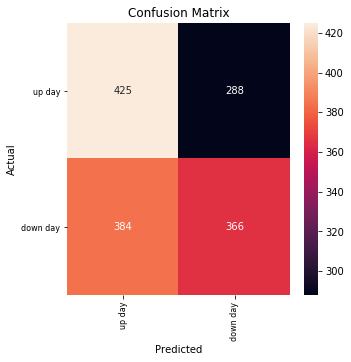

In [85]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()